In [331]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates

In [ ]:
#using a 12-month weighted moving average using historical data from EXEL to do a 12 month forecast

In [377]:
cols = ['Date', 'Close']
cols2 = ['Date', 'WMA']
exel = pd.read_csv('exel.csv', usecols=cols)
# exel = exel.insert()
l = np.arange(1, 13)
wma = exel['Close'].rolling(12).apply(lambda price: np.dot(price, l)/l.sum(), raw=True)

exel['WMA'] = wma


w = exel['WMA'].dropna()



nwma = w.rolling(12).apply(lambda p: np.dot(p, l)/l.sum(), raw=True)

nwma.dropna(inplace=True)
nwma = nwma[0:13]
m = pd.date_range('2022-10-01','2023-09-01', 
              freq='MS').strftime("%Y-%m-%d").tolist()


lm = list(zip(m, nwma))

df = pd.DataFrame(lm, columns=cols2)

model = pd.concat([exel, df])
model.reset_index(inplace=True)


exel['Date'] = pd.to_datetime(exel['Date'])
model['Date'] = pd.to_datetime(model['Date'])

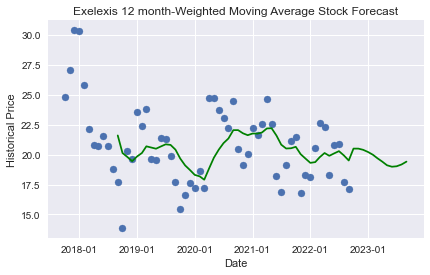

In [382]:
%matplotlib inline

fig, ax = plt.subplots()
plt.style.use('seaborn')
plt.scatter(exel['Date'], exel['Close'])
plt.plot(model['Date'], model['WMA'], color='g')
ax.set_xlabel('Date')
ax.set_ylabel('Historical Price')
ax.set_title('Exelexis 12 month-Weighted Moving Average Stock Forecast')

date_form = mdates.DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)

